In [70]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("dataset_buys_comp.csv")
df.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1


In [72]:
df.isnull().sum()

Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64

In [73]:
print("Value Kolom:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Value Kolom:
Age: ['Tua' 'Paruh Baya' 'Muda']
Income: ['Tinggi' 'Rendah' 'Sedang']
Student: ['Ya' 'Tidak']
Credit_Rating: ['Buruk' 'Baik']
Buys_Computer: [0 1]


In [74]:
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.columns[:-1]:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

In [75]:
X = df_encoded.drop("Buys_Computer", axis=1)
y = df_encoded["Buys_Computer"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Decision Tree dengan entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [77]:
print("\n--- Evaluasi Model Entropy ---")
y_pred_entropy = dt_entropy.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))


--- Evaluasi Model Entropy ---
Akurasi: 0.805
Confusion Matrix:
 [[ 57  14]
 [ 25 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        71
           1       0.88      0.81      0.84       129

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.82      0.81      0.81       200



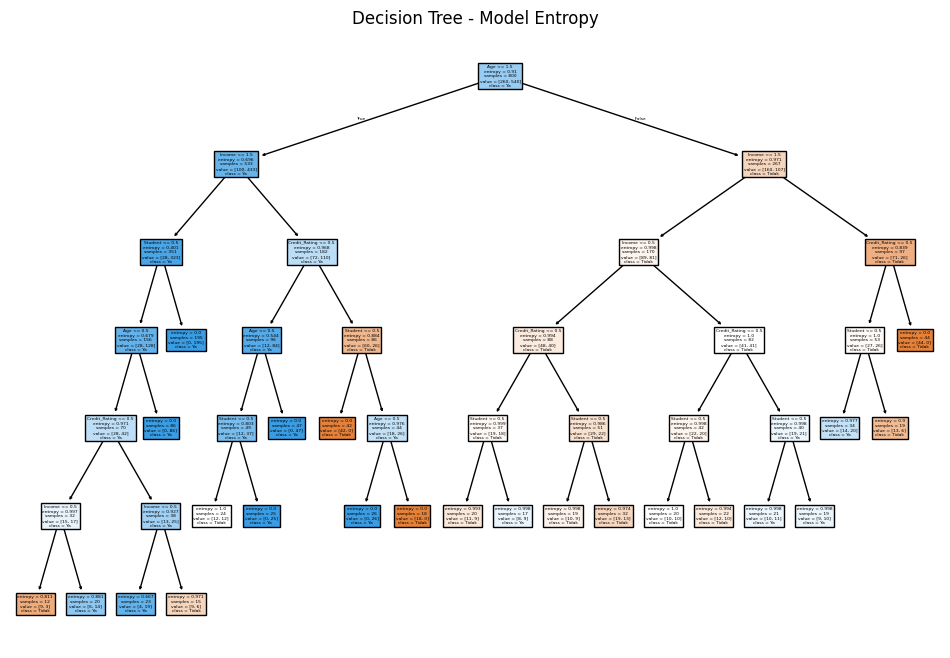

In [78]:
# Visualisasi salah satu tree
plt.figure(figsize=(12, 8))
plot_tree(dt_entropy, feature_names=X.columns, class_names=["Tidak", "Ya"], filled=True)
plt.title("Decision Tree - Model Entropy")
plt.show()

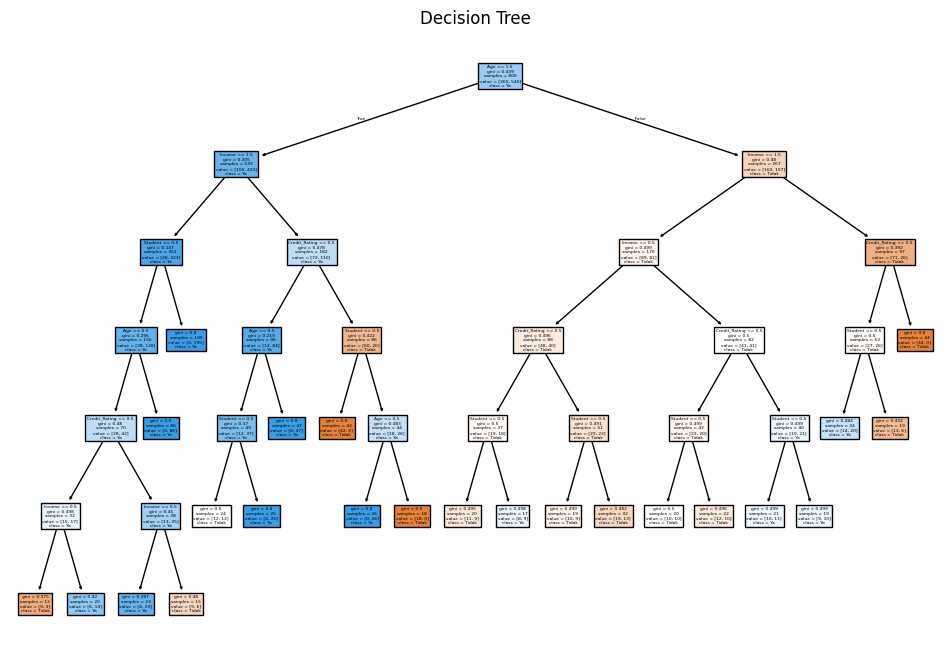

In [79]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Tidak", "Ya"], filled=True)
plt.title("Decision Tree")
plt.show()

In [80]:
feature_importance = pd.DataFrame({
    'Fitur': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
           Fitur  Importance
0            Age    0.475662
3  Credit_Rating    0.206961
1         Income    0.175881
2        Student    0.141496


In [81]:
# Feature importance untuk model entropy
feature_importance = pd.DataFrame({
    'Fitur': X.columns,
    'Importance': dt_entropy.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Entropy):")
print(feature_importance)


Feature Importance (Entropy):
           Fitur  Importance
0            Age    0.446698
2        Student    0.202257
3  Credit_Rating    0.181420
1         Income    0.169624


In [82]:
# Pengujian dengan data baru
data_baru = {
    'Age': ['Muda'],
    'Income': ['Rendah'],
    'Student': ['Ya'],
    'Credit_Rating': ['Buruk']
}

print("Data Baru:")
print(data_baru)

Data Baru:
{'Age': ['Muda'], 'Income': ['Rendah'], 'Student': ['Ya'], 'Credit_Rating': ['Buruk']}


In [83]:
df_new = pd.DataFrame(data_baru)

In [84]:
# Encode fitur baru
for column in df_new.columns:
    df_new[column] = label_encoders[column].transform(df_new[column])

In [85]:
# Prediksi dengan kedua model
hasil_default = dt_model.predict(df_new)
hasil_entropy = dt_entropy.predict(df_new)

print("\nPrediksi data baru:")
print("Model default     :", 'Layak' if hasil_default[0] == 1 else 'Tidak Layak')
print("Model Entropy  :", 'Layak' if hasil_entropy[0] == 1 else 'Tidak Layak')


Prediksi data baru:
Model default     : Layak
Model Entropy  : Layak
